# A. Data Exploration
I explored the basic format of the script using episode I

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib

## Raw Data & Config

In [2]:
data_home = 'C:/Users/user/Desktop/24Spring_ETA_Project/Dataset'
data_prefix = 'Star Wars- Episode '
output_dir = 'C:/Users/user/Desktop/24Spring_ETA_Project/Output'

ep1 = f"{data_home}/{data_prefix}I - The Phantom Menace (1999).rtf"
ep2 = f"{data_home}/{data_prefix}II - Attack of the Clones (2002).rtf"
ep3 = f"{data_home}/{data_prefix}III - Revenge of the Sith (2005).rtf"
ep4 = f"{data_home}/{data_prefix}IV - A New Hope (1977).rtf"
ep5 = f"{data_home}/{data_prefix}V - The Empire Strikes Back (1980).rtf"
ep6 = f"{data_home}/{data_prefix}VI - Return of the Jedi (1983).rtf"

In [3]:
lines = open(ep1, 'r').readlines()

## Exploring scripts (based on episode I)

### Exploring parts of raw text

In [4]:
#top 15 lines of starwars starting subtitles
lines[0:14]

['{\\rtf1\\ansi\\ansicpg1252\\cocoartf2639\n',
 '\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fmodern\\fcharset0 Courier;}\n',
 '{\\colortbl;\\red255\\green255\\blue255;\\red26\\green26\\blue26;}\n',
 '{\\*\\expandedcolortbl;;\\cssrgb\\c13333\\c13333\\c13333;}\n',
 '\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n',
 '\\deftab720\n',
 '\\pard\\pardeftab720\\partightenfactor0\n',
 '\n',
 '\\f0\\fs26\\fsmilli13125 \\cf2 \\expnd0\\expndtw0\\kerning0\n',
 '\\outl0\\strokewidth0 \\strokec2 "A long time ago in a galaxy far, far away...."\\\n',
 '\\\n',
 'A vast sea of stars serves as the backdrop for the MAIN TITLE,\\\n',
 'followed by a ROLL UP, which crawls up into infinity.\\\n',
 '\\\n']

In [5]:
# episode 1 & title
lines[14:16]

['"EPISODE 1 THE PHANTOM MENACE"\\\n', '\\\n']

In [6]:
# descriptions & notice how line breaks are \\\n regardless of actual sentence
lines[16:25]

['"Turmoil has engulfed the Galactic Republic. The taxation of\\\n',
 'trade routes to outlaying star systems is in dispute.  Hoping\\\n',
 'to resolve the matter with a blockade of deadly battleships,\\\n',
 'the greedy Trade Federation has stopped all shipping to the\\\n',
 'small planet of Naboo.\\\n',
 '\\\n',
 'While the congress of the Republic endlessly debates this\\\n',
 'alarming chain of events, the Supreme Chancellor has secretly\\\n',
 'dispatched two Jedi Knights, the guardians of peace and\\\n']

In [7]:
# characters are tabbed twice (\t\t), their lines follow with only one tab (\t)
lines[42:50]

['\t\tCAPTAIN\\\n',
 '\tYes, sir?\\\n',
 '\\\n',
 '\t\tQUI-GON (O.S.)\\\n',
 '\tTell them we wish to board at once.\\\n',
 '\\\n',
 '\t\tCAPTAIN\\\n',
 '\tYes, sir.\\\n']

In [8]:
# lines are also divided into several lines regardless of sentence structure
lines[54:60]

['\t\tCAPTAIN\\\n',
 '\tWith all due respect for the Trade\\\n',
 '\tFederation, the Ambassadors for the\\\n',
 '\tSupreme Chancellor wish to board\\\n',
 '\timmediately.\\\n',
 '\\\n']

### Line dividing
first divided senteces for lines

In [9]:
chunk_pat = '\\\n'
chunks = open(ep1, 'r').read().split(chunk_pat)
chunks[:5]

['{\\rtf1\\ansi\\ansicpg1252\\cocoartf2639\n\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fmodern\\fcharset0 Courier;}\n{\\colortbl;\\red255\\green255\\blue255;\\red26\\green26\\blue26;}\n{\\*\\expandedcolortbl;;\\cssrgb\\c13333\\c13333\\c13333;}\n\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n\\deftab720\n\\pard\\pardeftab720\\partightenfactor0\n\n\\f0\\fs26\\fsmilli13125 \\cf2 \\expnd0\\expndtw0\\kerning0\n\\outl0\\strokewidth0 \\strokec2 "A long time ago in a galaxy far, far away...."',
 '',
 'A vast sea of stars serves as the backdrop for the MAIN TITLE,',
 'followed by a ROLL UP, which crawls up into infinity.',
 '']

In [10]:
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'
text.shape

(7258, 1)

### Making Lists targetted for scripts (lines, characters, others)

In [11]:
# general descriptions, acting/filming related prompts are written without any formatting such as indentations or bold.
# Since the current 'text' is splitted with \\\n, these are also deleted.
text[0:4]

,chunk_str
chunk_id,
0,{\rtf1\ansi\ansicpg1252\cocoartf2639\n\cocoate...
1,
2,A vast sea of stars serves as the backdrop for...
3,"followed by a ROLL UP, which crawls up into in..."


In [12]:
# character names are indented twice (\t\t)
# according lines are indented once (\t)
# this is for episode I, but it was different for episode V,
# therefore splitting characters with lines are done differently below
text[44:50]

,chunk_str
chunk_id,
44,
45,\t\tCAPTAIN
46,\tWith all due respect for the Trade
47,"\tFederation, the Ambassadors for the"
48,\tSupreme Chancellor wish to board
49,\timmediately.


In [13]:
Dialogue = [] # dialogue here is not comprised of sentences per characters
Characters = []
Description = []
for i in range (0, 7258):
    if '\t\t\t' in text.chunk_str[i]:
        continue
    if '\t\t' in text.chunk_str[i]:
        Characters.append(text.chunk_str[i].replace('\t\t', '').replace('(O.S.)','').replace('(V.O.)', '').replace('(SUBTITLED)', '').replace('(SUTITLED)','').replace('-','').replace(' ', '').replace('.', ''))
        continue
    if '\t' in text.chunk_str[i]:
        Dialogue.append(text.chunk_str[i].replace('\t',''))
        continue
    else:
        Description.append(text.chunk_str[i])

In [14]:
# Dialogues - only includes the lines that are actually spoken in the movie
line_list = pd.DataFrame(Dialogue, columns=['line_str'])
line_list.index.name = 'order'
line_list[0:10]

,line_str
order,
0,Captain.
1,"Yes, sir?"
2,Tell them we wish to board at once.
3,"Yes, sir."
4,With all due respect for the Trade
5,"Federation, the Ambassadors for the"
6,Supreme Chancellor wish to board
7,immediately.
8,"Yes, yes, of coarse...ahhh...as you"


In [15]:
# Characters - lists characters in order of their speech
character_list = pd.DataFrame(Characters, columns=['character_str'])
character_list.index.name = 'order'
character_list[0:5]

,character_str
order,
0,QUIGON
1,CAPTAIN
2,QUIGON
3,CAPTAIN
4,CAPTAIN


In [16]:
# Description - only includes the remaining description parts used for acting or filming
other_list = pd.DataFrame(Description, columns=['other_str'])
other_list.index.name = 'order'
other_list.sample(5)

,other_str
order,
808,hanger shoot at them.
2063,embrace. Hundreds of SPECTATORS join them and ...
1913,The blast cuts along the engine until finally ...
2295,ANAKIN drops to the ground just as DARTH MAUL ...
2797,


### Capturing Character Names

In [17]:
character_count = character_list.character_str.value_counts().to_frame('n')
character_count.index.name = 'character_str'
character_count['p'] = character_count.n / character_count.n.sum()
character_count.head(5)

,n,p
character_str,,
QUIGON,210,0.190045
ANAKIN,186,0.168326
JARJAR,90,0.081448
OBIWAN,75,0.067873
PADME,60,0.054299


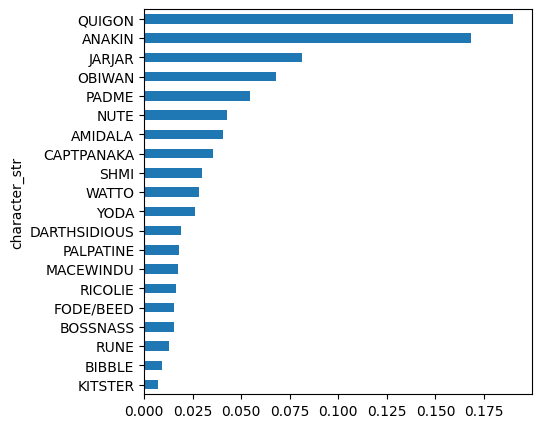

In [18]:
# character_count.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False)
character_count.p.head(20).sort_values().plot.barh(figsize=(5,5));

### Convert Lines to Tokens
using original text, making token and vocab dataset for further analysis

In [19]:
chunk_pat = '\\\n'
chunks = open(ep1, 'r').read().split(chunk_pat)
chunks[:5]
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'
# text.shape
# text.head(15)
text = text.drop([0,1]) #get rid of the first font part
text

,chunk_str
chunk_id,
2,A vast sea of stars serves as the backdrop for...
3,"followed by a ROLL UP, which crawls up into in..."
4,
5,"""EPISODE 1 THE PHANTOM MENACE"""
6,
...,...
7253,
7254,\t\t\t\t\t IRIS OUT:
7255,


#### Extract Token

In [20]:
# Remove remaining breaks
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']
K.sample(15)
# text.chunk_str = text.chunk_str.str.replace('"', '').replace('\t\t', '').replace('(O.S.)','').replace('(V.O.)', '').replace('(SUBTITLED)', '').replace('(SUTITLED)','').replace('-','').replace(' ', '').replace('.', '').replace('\t','').str.strip()

,,token_str
chunk_num,token_num,
6595,8,their
1014,3,submarine
3153,6,engines
4069,1,get
1561,0,(no
4836,0,on
7247,8,"GUARDS,"
4818,2,"enters,"
3341,7,"WATTO,"


In [21]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()
K

token_str term_str
chunk_num token_num                   
2         0                 A        a
          1              vast     vast
          2               sea      sea
          3                of       of
          4             stars    stars
...                       ...      ...
7254      0              IRIS     iris
          1              OUT:      out
7256      0               END      end
          1            TITLES   titles
7257      0                 }         

[28311 rows x 2 columns]

#### Extract Vocabulary

In [22]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

In [23]:
V.head(5)

,n
term_str,
the,1745
and,662
to,640
a,604
jar,504


In [24]:
V['p'] = V.n / V.n.sum()
V

,n,p
term_str,,
the,1745,0.061637
and,662,0.023383
to,640,0.022606
a,604,0.021334
jar,504,0.017802
...,...,...
offer,1,0.000035
beeping,1,0.000035
capsules,1,0.000035


## Generalizing for 6 different episode files (Functions)

### CHECK SHAPE FOR ALL EPISODES

In [25]:
def shape(episode):
    if episode == ep3:
        chunk_pat = '\n'
        chunks = open(episode, 'r').read().split(chunk_pat)
        chunks[:5]
        text = pd.DataFrame(chunks, columns=['chunk_str'])
        text.index.name = 'chunk_id'
        return text.shape
    else:
        chunk_pat = '\\\n'
        chunks = open(episode, 'r').read().split(chunk_pat)
        chunks[:5]
        text = pd.DataFrame(chunks, columns=['chunk_str'])
        text.index.name = 'chunk_id'
        return text.shape

In [26]:
# shape(ep1) 7258
# shape(ep2) 6254
# shape(ep4) 6313
# shape(ep5) 6437
# shape(ep6) 4998
shape(ep3)

(4079, 1)

In [27]:
def gettoken(episode):
    if episode == ep3:
        chunk_pat = '\n'
        chunks = open(episode, 'r').read().split(chunk_pat)
        text = pd.DataFrame(chunks, columns=['chunk_str'])
        text.index.name = 'chunk_id'
        text = text.drop([0,1])
        K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
        K.index.names = ['chunk_num','token_num']
        K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()
        
        V = K.term_str.value_counts().to_frame('n')
        V.index.name = 'term_str'
        V['p'] = V.n / V.n.sum()
        
        return K, V
    else:
        chunk_pat = '\\\n'
        chunks = open(episode, 'r').read().split(chunk_pat)
        text = pd.DataFrame(chunks, columns=['chunk_str'])
        text.index.name = 'chunk_id'
        text = text.drop([0,1])
        K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
        K.index.names = ['chunk_num','token_num']
        K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()
        
        V = K.term_str.value_counts().to_frame('n')
        V.index.name = 'term_str'
        V['p'] = V.n / V.n.sum()
        
        return K, V

### function for targetted text

In [28]:
# shape(ep1) 7258
# shape(ep2) 6254
# shape(ep3) 4079
# shape(ep4) 6313
# shape(ep5) 6437
# shape(ep6) 4998


def get_text(episode):
    if episode == ep3:
        chunk_pat = '\n'
        chunks = open(episode, 'r').read().split(chunk_pat)
        text = pd.DataFrame(chunks, columns=['chunk_str'])
        text.index.name = 'chunk_id'
        text = text 
    
    else:
        chunk_pat = '\\\n'
        chunks = open(episode, 'r').read().split(chunk_pat)
        text = pd.DataFrame(chunks, columns=['chunk_str'])
        text.index.name = 'chunk_id'
        text = text.drop([0,1])

    return text

def targetlist(text,episode):
    Dialogue = []
    Characters = []
    Description = []

    if episode == ep1:
        for i in range (2, 7258):
            if '\t\t\t' in text.chunk_str[i]:
                continue
            if '\t\t' in text.chunk_str[i]:
                Characters.append(text.chunk_str[i].replace('\t\t', '').replace('(O.S.)','').replace('(V.O.)', '').replace('(SUBTITLED)', '').replace('(SUTITLED)','').replace('-','').replace(' ', '').replace('.', ''))
                continue
            if '\t' in text.chunk_str[i]:
                Dialogue.append(text.chunk_str[i].replace('\t',''))
                continue
            else:
                Description.append(text.chunk_str[i])
    elif episode == ep2:
        for i in range (2, 6254):
            if '\t\t\t' in text.chunk_str[i]:
                continue
            if '\t\t' in text.chunk_str[i]:
                if text.chunk_str[i].strip().startswith(('(')):
                    Description.append(text.chunk_str[i])
                else:
                    Characters.append(text.chunk_str[i].replace('\t\t', '').replace('(O.S.)','').replace('(V.O.)', '').replace('(SUBTITLED)', '').replace('(SUTITLED)','').replace('-','').replace(' ', '').replace('.', ''))
                continue
            if '\t' in text.chunk_str[i]:
                Dialogue.append(text.chunk_str[i].replace('\t',''))
                continue
            else:
                Description.append(text.chunk_str[i])
    elif episode == ep3:
        for i in range (0, 4079):
            if '\t' in text.chunk_str[i]:
                Description.append(text.chunk_str[i])
                continue
            if text.chunk_str[i].startswith(('INTERIOR', 'EXTERIOR')):
                Description.append(text.chunk_str[i])
                continue

            elif ':' in text.chunk_str[i] and text.chunk_str[i].split(':')[0].isupper():
                parts = text.chunk_str[i].split(':', 1) 
                Characters.append(parts[0].strip())
                if len(parts) > 1:
                    Dialogue.append(parts[1].strip())
            else:
                Description.append(text.chunk_str[i])  
                
    elif episode == ep4:
        for i in range (2, 6313):
            if '\t' in text.chunk_str[i]:
                Description.append(text.chunk_str[i])
                continue
            if text.chunk_str[i].startswith(('INTERIOR', 'EXTERIOR')):
                Description.append(text.chunk_str[i])
                continue

            elif ':' in text.chunk_str[i] and text.chunk_str[i].split(':')[0].isupper():
                parts = text.chunk_str[i].split(':', 1) 
                Characters.append(parts[0].strip())
                if len(parts) > 1:
                    Dialogue.append(parts[1].strip())
            else:
                Description.append(text.chunk_str[i])                    
  
    elif episode == ep5:
        # had slightly different foramting
        for i in range (2, 6437):
            # if '\t\t\t' in text.chunk_str[i]:
            #     continue
            if '\t\t\t\t' in text.chunk_str[i]:
                Characters.append(text.chunk_str[i].replace('\t\t', '').replace('(O.S.)','').replace('(V.O.)', '').replace('(SUBTITLED)', '').replace('(SUTITLED)','').replace('-','').replace(' ', '').replace('.', ''))
                continue
            if '\t\t' in text.chunk_str[i]:
                Dialogue.append(text.chunk_str[i].replace('\t',''))
                continue
            else:
                Description.append(text.chunk_str[i])

    elif episode == ep6:
        for i in range (2, 4998):
            if '\t\t\t' in text.chunk_str[i]:
                continue
            if '\t\t' in text.chunk_str[i]:
                Characters.append(text.chunk_str[i].replace('\t\t', '').replace('(O.S.)','').replace('(V.O.)', '').replace('(SUBTITLED)', '').replace('(SUTITLED)','').replace('-','').replace(' ', '').replace('.', ''))
                continue
            if '\t' in text.chunk_str[i]:
                Dialogue.append(text.chunk_str[i].replace('\t',''))
                continue
            else:
                Description.append(text.chunk_str[i])

    line_list = pd.DataFrame(Dialogue, columns=['chunk_str'])
    line_list.index.name = 'order'

    other_list = pd.DataFrame(Description, columns=['chunk_str'])
    other_list.index.name = 'order'

    character_list = pd.DataFrame(Characters, columns=['chunk_str'])
    character_list.index.name = 'order'
    character_count = character_list.chunk_str.value_counts().to_frame('n')
    character_count.index.name = 'character_str'
    character_count['p'] = character_count.n / character_count.n.sum()

    return line_list, other_list, character_count

### episode 1

In [29]:
text_ep1 = get_text(ep1)
line_list_ep1, other_list_ep1, character_count_ep1 = targetlist(text_ep1, ep1)

line_list_ep1.to_csv(f"{output_dir}/explore/ep1-line.csv")
other_list_ep1.to_csv(f"{output_dir}/explore/ep1-other.csv")
character_count_ep1.to_csv(f"{output_dir}/explore/ep1-character.csv")

In [30]:
# character_count_ep1.head()

### episode 2

In [31]:
text_ep2 = get_text(ep2)
line_list_ep2, other_list_ep2, character_count_ep2 = targetlist(text_ep2, ep2)

line_list_ep2.to_csv(f"{output_dir}/explore/ep2-line.csv")
other_list_ep2.to_csv(f"{output_dir}/explore/ep2-other.csv")
character_count_ep2.to_csv(f"{output_dir}/explore/ep2-character.csv")

In [32]:
# for idx in character_count_ep2.index:
#     print(repr(idx))

In [33]:
character_count_ep2.reset_index(inplace=True)
# character_count_ep2

In [34]:
# character_count_ep2['character_str'] = character_count_ep2['character_str'].replace({
#     r'PADM\n\\f1\\uc0\\u65533\n\\f0': 'PADME',
#     r'CORD\n\\f1\\uc0\\u65533\n\\f0': 'CORD'
# })
character_count_ep2.loc[2, 'character_str'] = 'PADME'
character_count_ep2.loc[65, 'character_str'] = 'CORD'

In [35]:
character_count_ep2 = character_count_ep2.groupby('character_str').agg({
    'n': 'sum',
    'p': 'mean'
})

character_count_ep2.reset_index(inplace=True)

In [36]:
character_count_ep2 = character_count_ep2.sort_values(by='n', ascending=False)
character_count_ep2.set_index('character_str', inplace=True)
# character_count_ep2.head()

### episode 3

In [37]:
text_ep3 = get_text(ep3)
line_list_ep3, other_list_ep3, character_count_ep3 = targetlist(text_ep3, ep3)

line_list_ep3.to_csv(f"{output_dir}/explore/ep3-line.csv")
other_list_ep3.to_csv(f"{output_dir}/explore/ep3-other.csv")
character_count_ep3.to_csv(f"{output_dir}/explore/ep3-character.csv")

In [38]:
# character_count_ep3.head()

### episode 4 

In [39]:
text_ep4 = get_text(ep4)
line_list_ep4, other_list_ep4, character_count_ep4 = targetlist(text_ep4, ep4)

line_list_ep4.to_csv(f"{output_dir}/explore/ep4-line.csv")
other_list_ep4.to_csv(f"{output_dir}/explore/ep4-other.csv")
character_count_ep4.to_csv(f"{output_dir}/explore/ep4-character.csv")

In [40]:
# character_count_ep4.head()

### episode 5

In [41]:
text_ep5 = get_text(ep5)
line_list_ep5, other_list_ep5, character_count_ep5 = targetlist(text_ep5, ep5)

line_list_ep5.to_csv(f"{output_dir}/explore/ep5-line.csv")
other_list_ep5.to_csv(f"{output_dir}/explore/ep5-other.csv")
character_count_ep5.to_csv(f"{output_dir}/explore/ep5-character.csv")

In [42]:
# character_count_ep5.head()

### episode 6

In [43]:
text_ep6 = get_text(ep6)
line_list_ep6, other_list_ep6, character_count_ep6 = targetlist(text_ep6, ep6)

line_list_ep6.to_csv(f"{output_dir}/explore/ep6-line.csv")
other_list_ep6.to_csv(f"{output_dir}/explore/ep6-other.csv")
character_count_ep6.to_csv(f"{output_dir}/explore/ep6-character.csv")

In [44]:
# character_count_ep6.head()

## Compare character by episodes

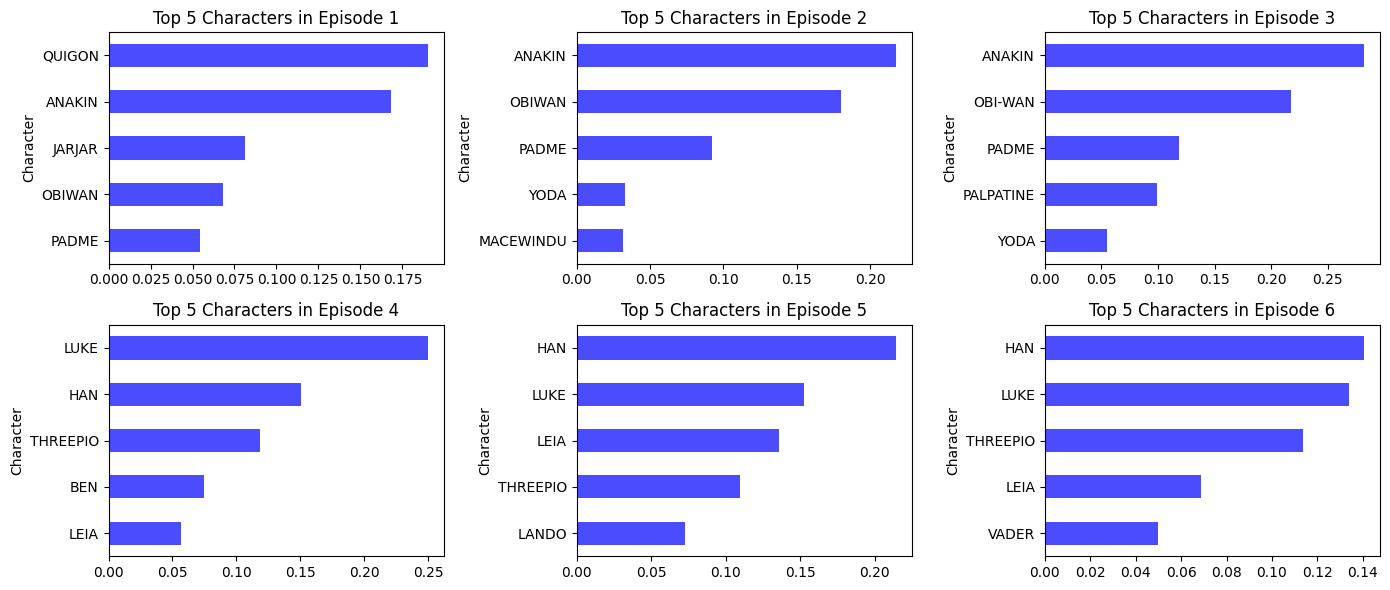

In [53]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(14, 6))
axs = axs.flatten()

for i, (episode_df, episode_title) in enumerate(zip([character_count_ep1, character_count_ep2, character_count_ep3, character_count_ep4, character_count_ep5, character_count_ep6], ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6'])):
    ax = axs[i] 
    episode_df['p'].head(5).sort_values().plot.barh(ax=ax, color='blue', alpha=0.7)
    ax.set_ylabel('Character')
    ax.set_title(f'Top 5 Characters in {episode_title}')

plt.tight_layout()
plt.show()


In [46]:
# character_count_ep1.p.head(5).sort_values().plot.barh(figsize=(5,5));

In [47]:
# character_count_ep2.p.head(5).sort_values().plot.barh(figsize=(5,5));

In [48]:
# character_count_ep3.p.head(5).sort_values().plot.barh(figsize=(5,5));

In [49]:
# character_count_ep4.p.head(5).sort_values().plot.barh(figsize=(5,5));

In [50]:
# character_count_ep5.p.head(5).sort_values().plot.barh(figsize=(5,5));

In [51]:
# character_count_ep6.p.head(5).sort_values().plot.barh(figsize=(5,5));